# Introduction to Scikit Learn

## The datasets package

The `datasets` module provides some small datasets which can be used while learning to use Scikit Learn. 

Additionally it provides 
* tools to fetch some real-world larger datasets.
* tools to generate datasets

### The `diabetes` dataset

In this session we will use the `diabetes` dataset. To use a dataset from the `datasets` module, first we import the module as shown below.

In [1]:
from sklearn import datasets      # diabetes dataset will be loaded from this module

Next we load diabetes dataset and note that the loaded dataset is a `Bunch` object.

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
type(diabetes)

sklearn.utils.Bunch

All datasets, whether loaded using loaders or fetched using fetchers functions, are `Bunch` objects. Every `Bunch` object holds at least two items:
1. an array with key `data`
2. a numpy array containing the target values, with key `target`

Next we look at the data description using `DESCR` attribute of the dataset. It may be noted that the description is designed to be printed using `print` function.

In [3]:
print(diabetes.DESCR)  # The dataset description

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## The Learners

Recall that supervised learning involves building a predictive model f(x). For minimizing the "inductive bias", we need to perform model selection. The model selection is essentially selection of class F in which the predictive model f is assumed to be contained.

Various choices of class F are available in 'Scikit Learn' in terms of the **Learners**. Different learners are organized in different submodules of Scikit Learn.

### Linear Regression

In this session, we will use the Learner `LinearRegression`. This learner is contained in the submodule `linear_model`.


We will consider an example of learning problem that uses the `diabetes` dataset. To keep the things simple in the begining, only one of the features will be used to ***train*** the learner. 

The dataset will be split into *training data* and *test data*. 
* The training data is used to train the learner. 
* The performance of the learner is evaluated using the test data.

(The present notebook is adapted from the `plot_ols.ipynb` notebook available on http://scikit-learn.org)

First we import the modules and functions that will be used in the code.

In [4]:
import matplotlib.pyplot as plt 
import numpy as np                         
from sklearn import linear_model  # Module containing Linear Regression based learning algorithm
from sklearn.metrics import mean_squared_error, r2_score  # for computing the performance metrics

In [13]:
diabetes.data.shape

(442, 10)

In [14]:
diabetes.target.shape

(442,)

Note that the module `metrics` provides various measures for evaluating the performance of the learning algorithms.

Next we look at correlation coefficients of each of the 10 features with the target

In [5]:
np.corrcoef(diabetes.data.T, diabetes.target)[:,-1] # -1 index to fetch the last column of matrix

array([ 0.18788875,  0.043062  ,  0.58645013,  0.44148385,  0.21202248,
        0.17405359, -0.39478925,  0.43045288,  0.56588343,  0.38248348,
        1.        ])

Note that the 3rd feature 'bmi' has the highest correlation of the target. 
So, we will use 'bmi' as the only feature for our simple linear regression based learner.

The scatter scatter diagram of target vs bmi throws more light on the usefulness of bmi as a feature

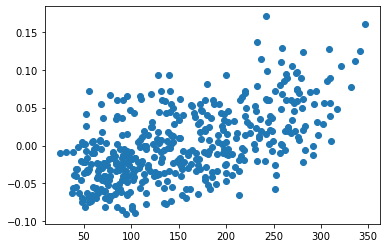

In [6]:
plt.scatter(diabetes.target, diabetes.data[:,2])

The scatter plot indicates that linear relationship might be adequate.

Next we extract the data on 'bmi' as the feature to be used. 
We also split the data into 'training data' and the 'test data'. 
Last 20 examples will be used as the test data.

In [7]:
# Use only the third feature 'bmi'
X = diabetes.data[:, np.newaxis, 2] # np.newaxis retains the second dimention

# Split the data into training/testing sets
X_train = X[:-20] # All except last 20 examples
X_test =X[-20:]

y_train = diabetes.target[:-20] # All except last 20 examples
y_test = diabetes.target[-20:]

Now we select the `LinearRegression` learner from the `linear_model` module and train it using the training data.

In [8]:
# Create linear regression object
LReg = linear_model.LinearRegression() # LReg is the learner (i.e. ML model) to be trained 

# Train the learner using the training data by invoking fit method
LReg.fit(X_train, y_train)

LinearRegression()

Once the learner is trained, some more attributes are added to it to reflect the learning that has been accomplished.

We cann now predict the target for the test data using the *trained* learner.

In [9]:
# Make predictions using the testing set
y_pred = LReg.predict(X_test)

`y_pred` now contains the predicted values of the target for the test data. In practice, one only is required to train the learner and then make predictions using the trained learner. In other words, the trained learner is a black-box for its enduser.

To know the learned model, we can print the model parameters as shown next.

In [1]:
print('The learned regression model is:\n')
print('Target = %.2f + %.2f*%s'%(LReg.intercept_, LReg.coef_, diabetes.feature_names[2]))

The learned regression model is:



NameError: name 'LReg' is not defined

However, before deploying a learner it is necessary to make sure that the learner performs well 
in doing its task. One may also need to evaluate its performance after the deployment to ascertain 
that the learner is still performing well in the live environment.

Next, we compute performance measures MSE and $R^2$ from the test data.

In [ ]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Explained variance score
print('R Squared: %.2f' % r2_score(y_test, y_pred))

The test data and the prediction for test data can be visualized by superimposing 
the learned regression line on the scatter plot for test data.

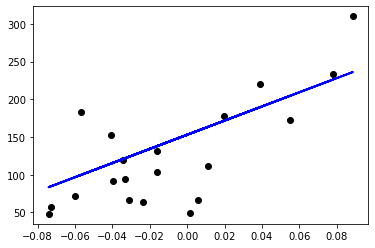

In [12]:
plt.scatter(X_test, y_test, color = 'k') # Creates a scatter plot
plt.plot(X_test, y_pred, color='blue', linewidth=2) # Adds line on the scatter plot